In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("wine.csv")

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
value_counts = df['quality'].value_counts()
most_frequent_value = value_counts.index[0]
print(f"The most frequently occurring value in the 'wine quality' column is: {most_frequent_value}")

The most frequently occurring value in the 'wine quality' column is: 5


In [ ]:
highest_quantity = df['quality'].max()
lowest_quantity = df['quality'].min()
print(f"The highest number in the wine quality column is: {highest_quantity}")
print(f"The lowest number in the quality column is: {lowest_quantity}")

The highest number in the wine quality column is: 8
The lowest number in the quality column is: 3


The correlation between fixed acidity and quality is: 0.124


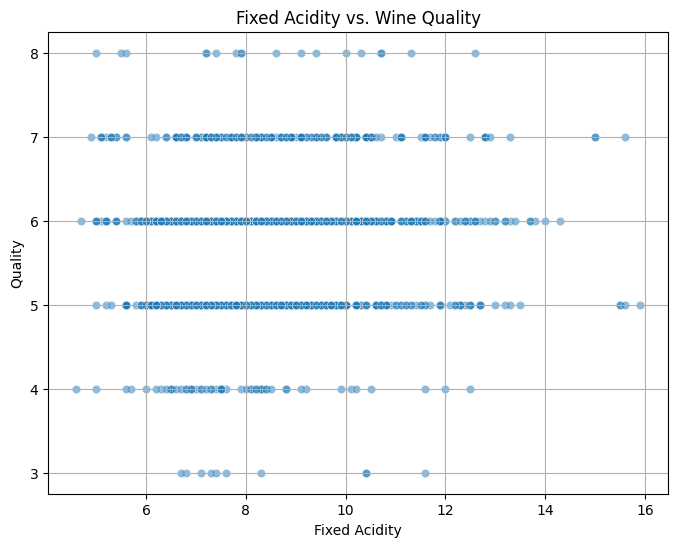

In [ ]:
correlation = df['fixed acidity'].corr(df['quality'])
print(f"The correlation between fixed acidity and quality is: {correlation:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='quality', data=df, alpha=0.5)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

The correlation between alcohol and quality is: 0.476


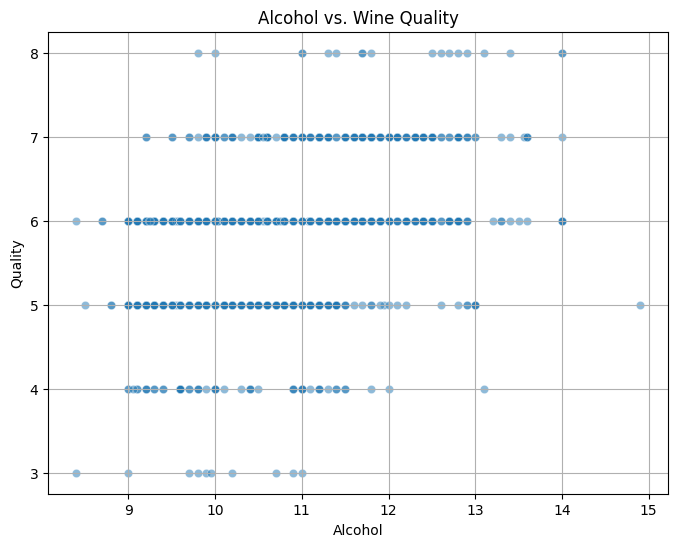

In [ ]:
correlation = df['alcohol'].corr(df['quality'])
print(f"The correlation between alcohol and quality is: {correlation:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=df, alpha=0.5)
plt.title('Alcohol vs. Wine Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

The correlation between free sulfur dioxide and quality is: -0.051


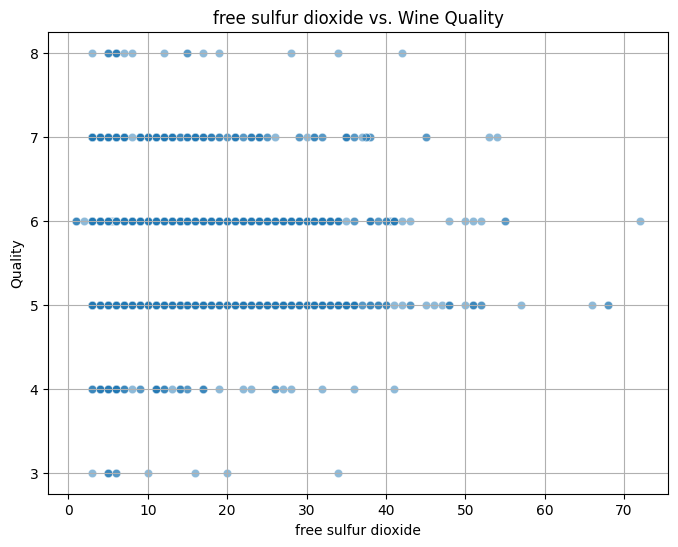

In [ ]:
correlation = df['free sulfur dioxide'].corr(df['quality'])
print(f"The correlation between free sulfur dioxide and quality is: {correlation:.3f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='free sulfur dioxide', y='quality', data=df, alpha=0.5)
plt.title('free sulfur dioxide vs. Wine Quality')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

In [ ]:
min_quality = df['quality'].min()
max_quality = df['quality'].max()
print(f"minimum quality score- {min_quality}")
print(f"Maximum quality score- {max_quality}")

best_quality_wines = df[df['quality'] == max_quality]
avg_residual_sugar_best = best_quality_wines['residual sugar'].mean()

lowest_quality_wines = df[df['quality'] == min_quality]
avg_residual_sugar_lowest = lowest_quality_wines['residual sugar'].mean()

print(f"\nAverage residual sugar for highest quality wine ({max_quality}): {avg_residual_sugar_best:.3f}")
print(f"Average residual sugar for lowest quality wine ({min_quality}): {avg_residual_sugar_lowest:.3f}")

minimum quality score- 3
Maximum quality score- 8

Average residual sugar for highest quality wine (8): 2.578
Average residual sugar for lowest quality wine (3): 2.635


In [ ]:
correlation = df['volatile acidity'].corr(df['quality'])
print(f"The correlation between volatile acidity and quality is: {correlation:.3f}")

The correlation between volatile acidity and quality is: -0.391


# Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree model: 0.57

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480



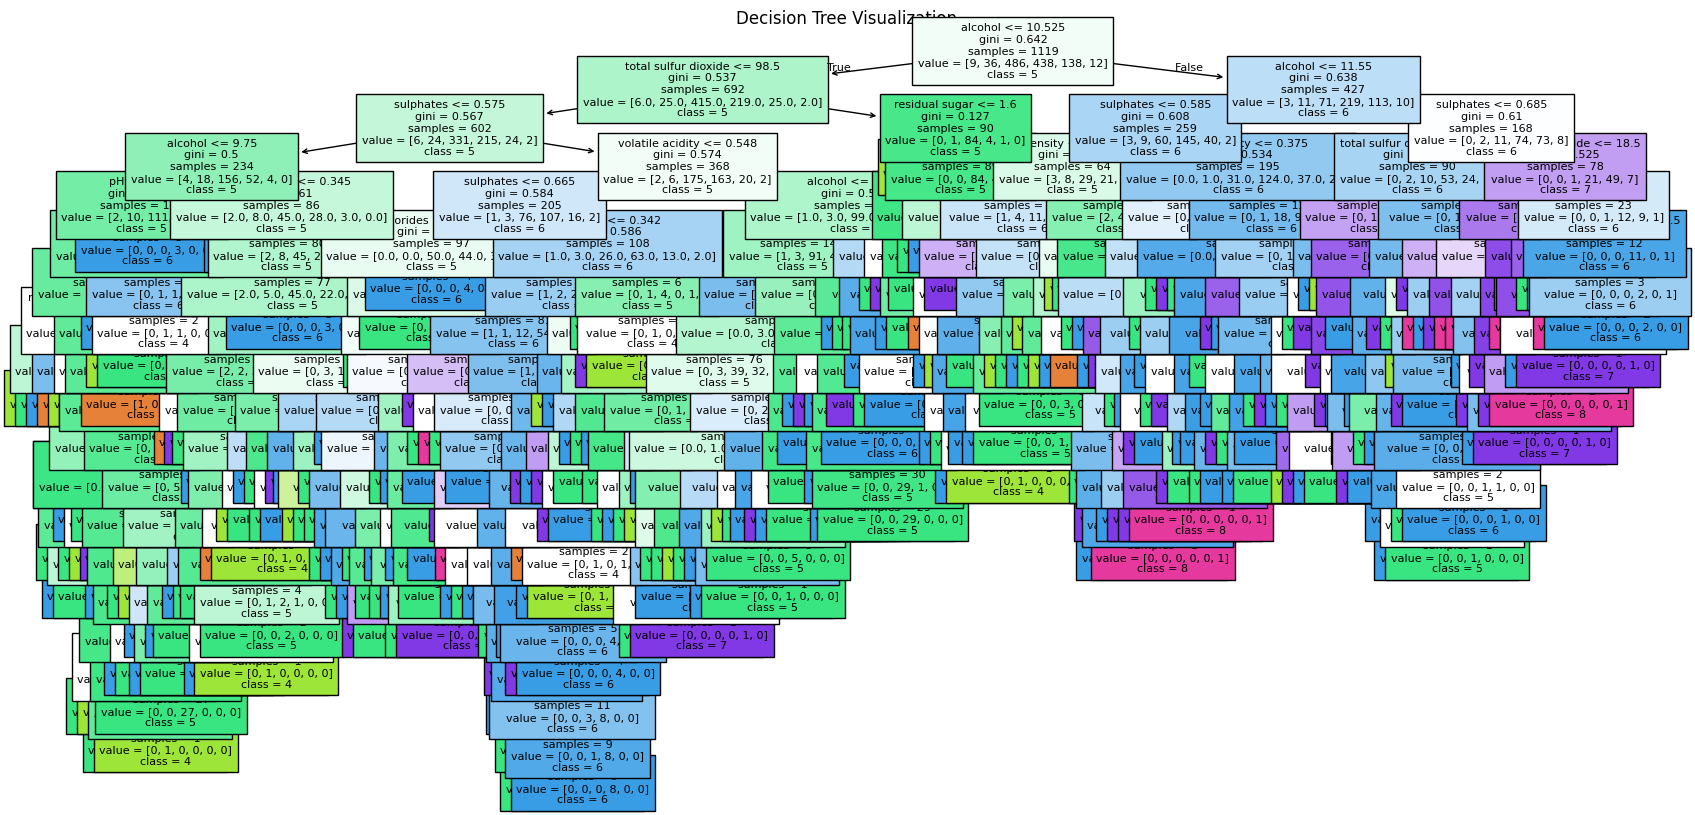

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the Random Forest model: 0.65

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.75      0.73       195
           6       0.62      0.69      0.65       200
           7       0.56      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.36       480
weighted avg       0.63      0.65      0.64       480

